# How to improve a neural network:
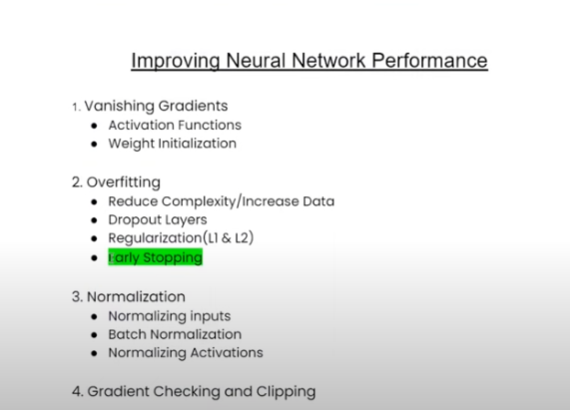
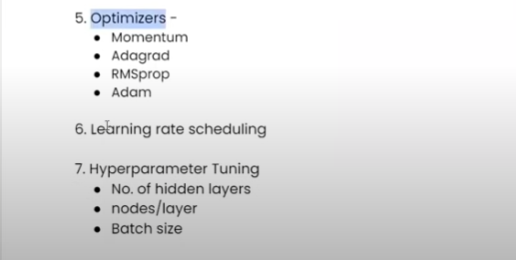

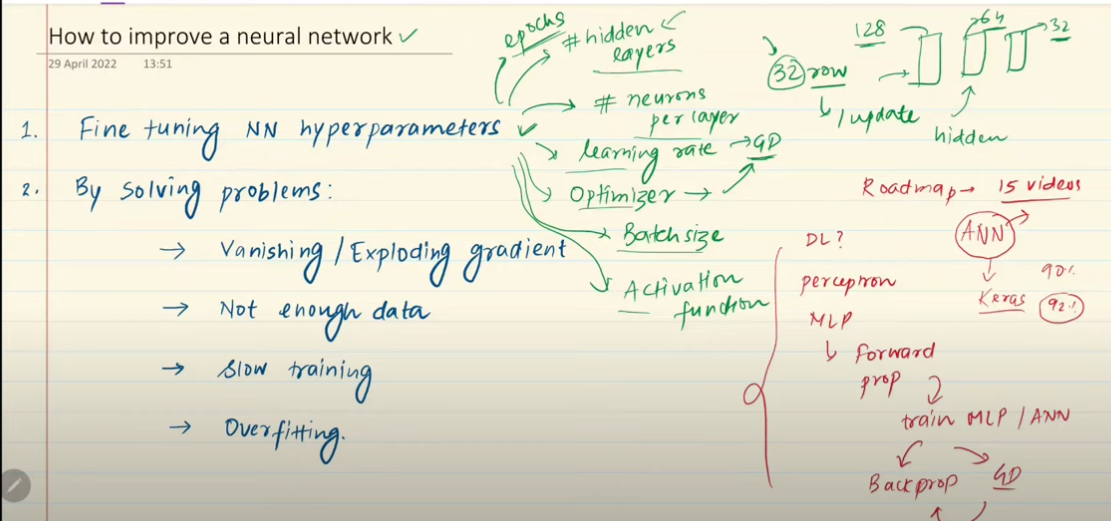

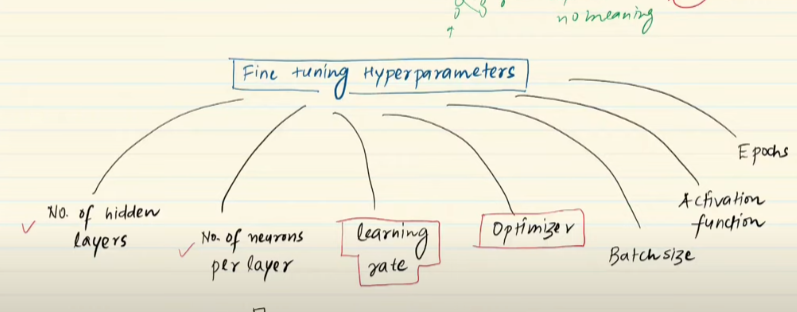

### 1 . No of hidden layers

if instead of the increase the number of neuron in one hidden layer , increase the hidden layers ,becauase of the representation learning initial layer capture the primitive pattern(it mean deep NN are capture hierarchy NN) :: we can increase the hidden layer till overfitting not happen 
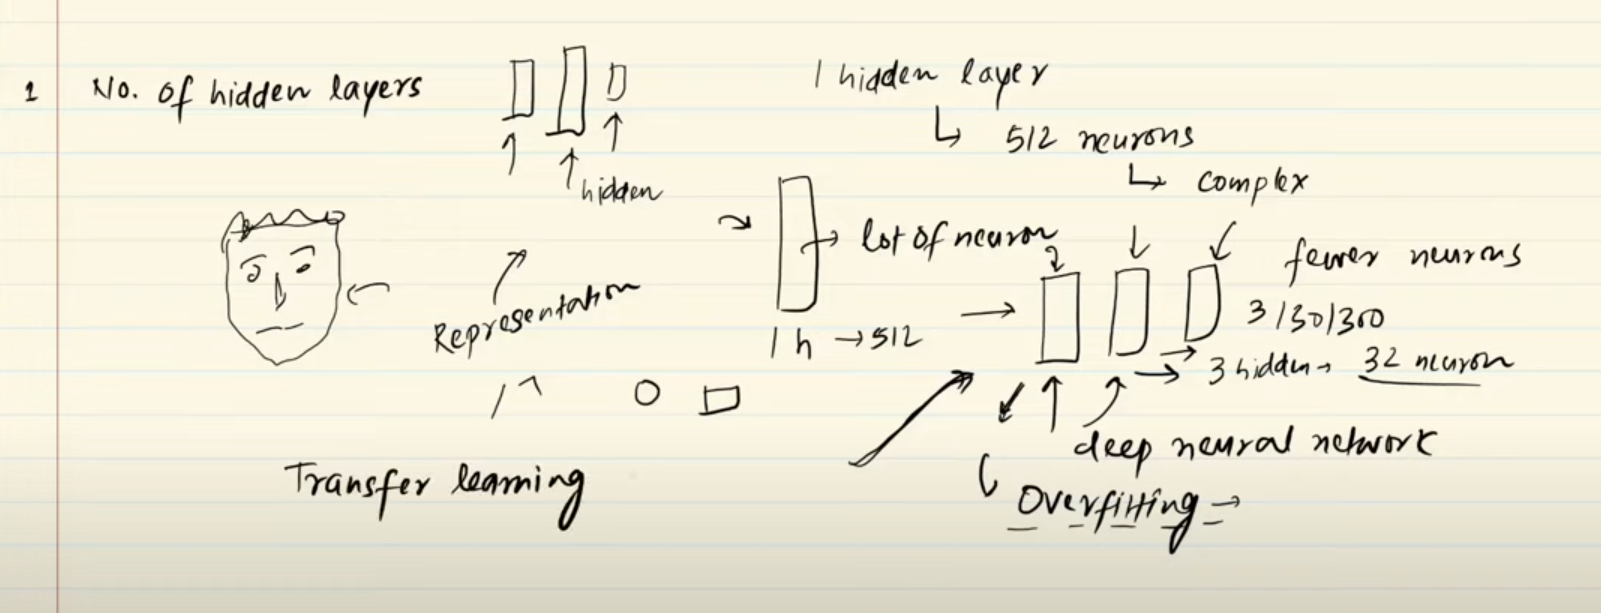

# 2. Neuron/layers

- for the regression and binary classification one output Neuron

-  for multiclass number of neuron equal to number of class

- NN should follow the pyramid structure
(why pyramid because initial layers capture the primitive pattern so then there will more primitive feature in initial layer)


- but pyramid Structure is  not compulsory

- Neuron per layer should be sufficent (more than requirement)

### 3 . Batch Size

#### - big batch size:
 we take big batch size<br>
(it depends on the GPU and RAM) (but result on big batch not accurate so we can use the WARMING UP Learning Rate)

WARMING UP Learning Rate  :<br> here initial few epochs the learning rate should be smaller then after we can increase learning rate for faster training with goood result
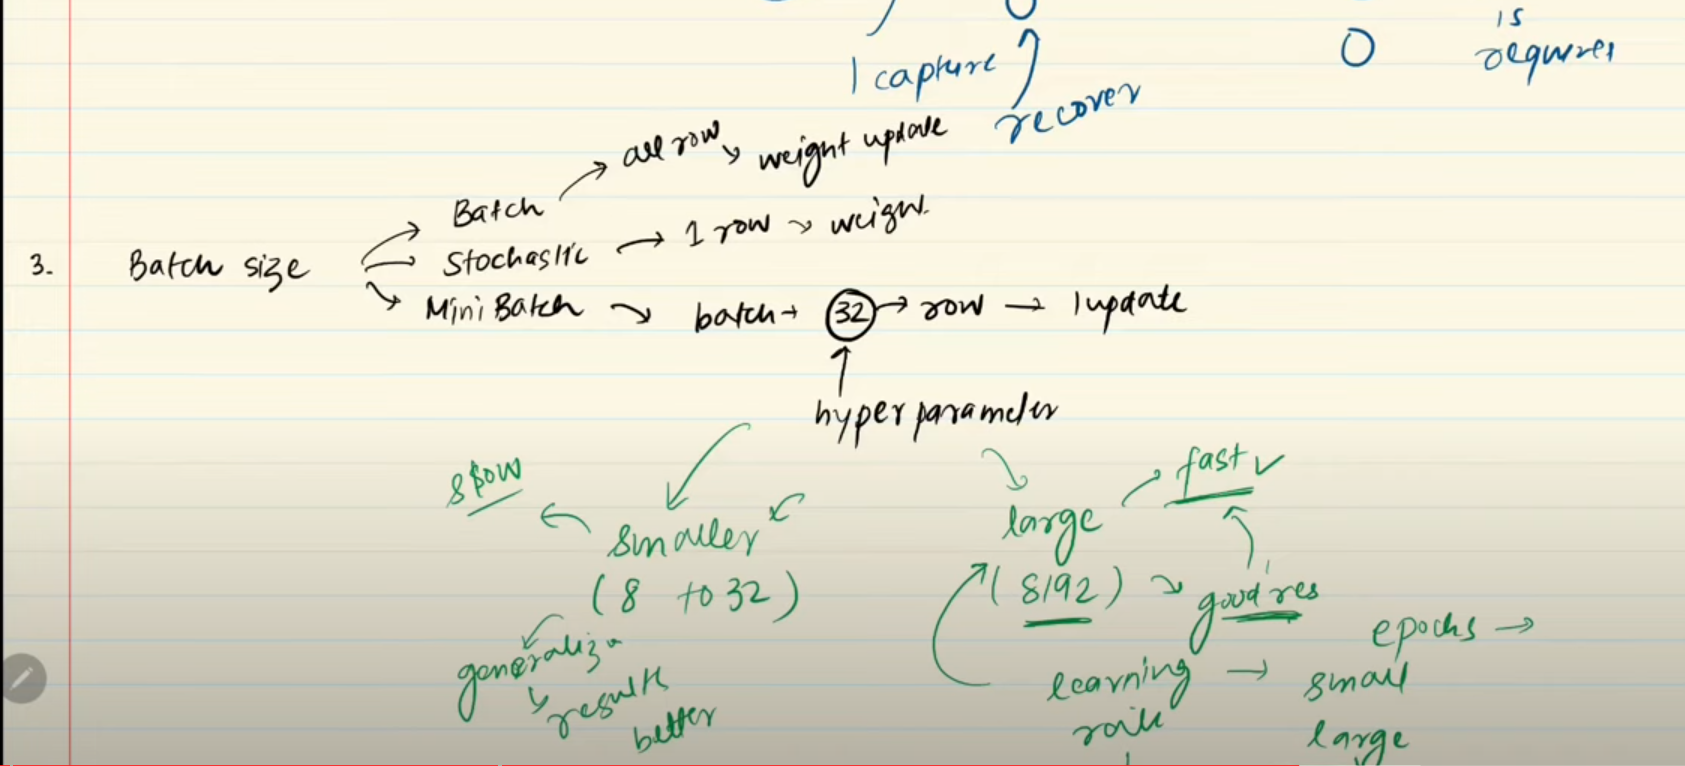

#### Smaller Batch : it slow training process but it give the good result

### 4. Epoch :<br>
what should be the epochs size >>> we can use any number as from 10,500,1000,2000

here we can use the Early Stopping:
Early Stoping : in keras it will check the result for previous and current epochs if the result are getting same or not getting imporve the it stop the training

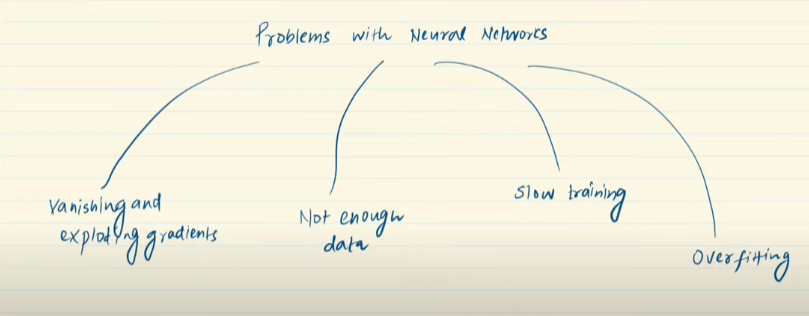

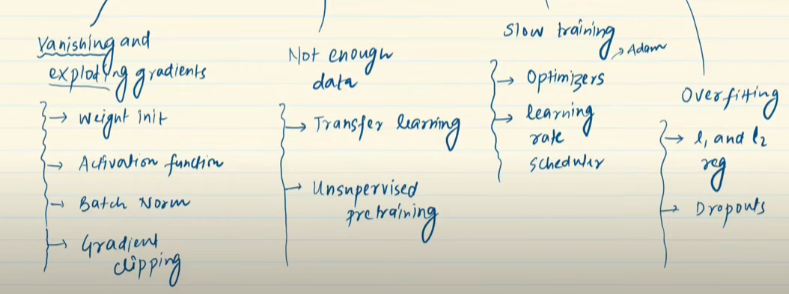

# Early Stopping 

if we use the big epochs number 
- first it will take time and 
- second will the overfitting issue may occurs

if use the early stoping in callback then we can stop the training  to avoid the overfitting

In [1]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

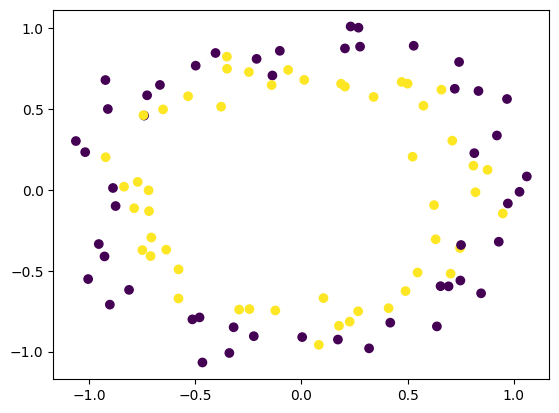

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

# Without Early Stopping 

In [5]:
import keras 
from keras.layers import Dense

from keras.models import Sequential

model  = Sequential()
model.add(Dense(units=256,activation='relu',input_dim = 2))
model.add(Dense(1,activation='sigmoid'))


c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


In [7]:
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test)
          )

Epoch 1/500


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5172 - loss: 0.6976 - val_accuracy: 0.5500 - val_loss: 0.6864
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4484 - loss: 0.6980 - val_accuracy: 0.5500 - val_loss: 0.6893
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5078 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4961 - loss: 0.6915 - val_accuracy: 0.4500 - val_loss: 0.6952
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5141 - loss: 0.6900 - val_accuracy: 0.3500 - val_loss: 0.6981
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5156 - loss: 0.6867 - val_accuracy: 0.3500 - val_loss: 0.7004
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5594 - loss: 0.6842 - val_accuracy: 0.4000 - val_loss: 0.7033
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5484 - loss: 0.6882 - val_accuracy: 0.3500 - val_loss: 0.7060
Epoc

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,052 (8.02 KB)

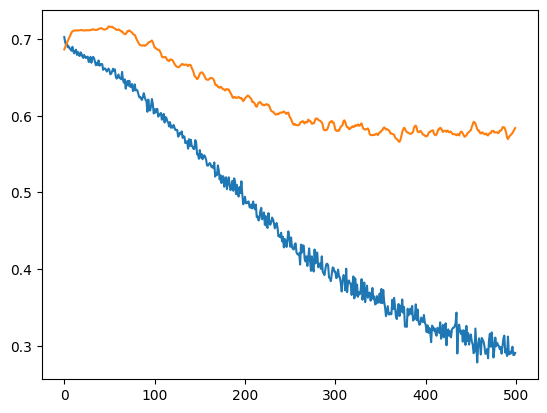

In [9]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

### from observation the model getting overfitting

# With Early Stopping

keras.callbacks.EarlyStopping(
    monitor="val_loss", # which loss want to monitor val_loss or training loss
    min_delta=0,         # 
    patience=0,   # if improvement not getting change then after how many iteration want run again so will not just rely on first 
    verbose=0, 
    mode="auto",  # use auto 
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)



### -Arguments(To reduce the overfitting)

- monitor: <br>
Quantity to be monitored. Defaults to "val_loss".
min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0.
- patience: <br>
Number of epochs with no improvement after which training will be stopped. Defaults to 0.
- verbose:<br> Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action. Defaults to 0.
- mode: <br> One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".
- baseline: <br> Baseline value for the monitored quantity. If not None, training will stop if the model doesn't show improvement over the baseline. Defaults to None.
- restore_best_weights:<br> Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set. Defaults to False.
- start_from_epoch: <br> Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped. Defaults to 0.

In [10]:
import keras 
from keras.layers import Dense

from keras.models import Sequential

model  = Sequential()
model.add(Dense(units=256,activation='relu',input_dim = 2))
model.add(Dense(1,activation='sigmoid'))

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# from keras.callbacks import Callback

early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [13]:



#set the callback
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=[early_stop])

Epoch 1/3500


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4906 - loss: 0.6928 - val_accuracy: 0.3500 - val_loss: 0.7062
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4945 - loss: 0.6901 - val_accuracy: 0.3500 - val_loss: 0.7075
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5203 - loss: 0.6894 - val_accuracy: 0.3500 - val_loss: 0.7101
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5383 - loss: 0.6880 - val_accuracy: 0.3500 - val_loss: 0.7104
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5344 - loss: 0.6859 - val_accuracy: 0.3500 - val_loss: 0.7114
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5617 - loss: 0.6838 - val_accuracy: 0.3500 - val_loss: 0.7131
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5484 - loss: 0.6828 - val_accuracy: 0.3500 - val_loss: 0.7136
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5641 - loss: 0.6850 - val_accuracy: 0.4000 - val_loss: 0.71

#### observation from early stopping happen at 23 epochs

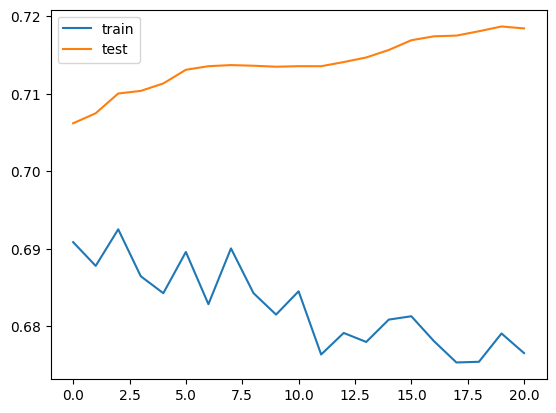

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Before Scaling

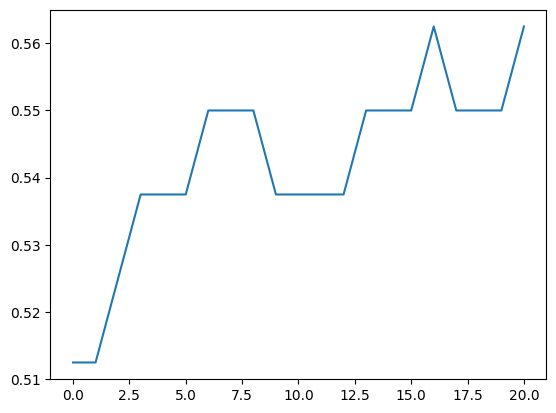

In [15]:
plt.plot(history.history['accuracy'])

# After Scaling

In [17]:
import keras 
from keras.layers import Dense

from keras.models import Sequential

model  = Sequential()
model.add(Dense(units=256,activation='relu',input_dim = 2))
model.add(Dense(1,activation='sigmoid'))



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_Scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.20, random_state=2)

#set the callback
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=[early_stop])

Epoch 1/3500


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4875 - loss: 0.7022 - val_accuracy: 0.5000 - val_loss: 0.6898
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5484 - loss: 0.6993 - val_accuracy: 0.5000 - val_loss: 0.6891
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5281 - loss: 0.6979 - val_accuracy: 0.5500 - val_loss: 0.6905
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4828 - loss: 0.6974 - val_accuracy: 0.5500 - val_loss: 0.6919
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5117 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4680 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6960
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5039 - loss: 0.6891 - val_accuracy: 0.4000 - val_loss: 0.6977
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4750 - loss: 0.6928 - val_accuracy: 0.4000 - val_loss: 0.70

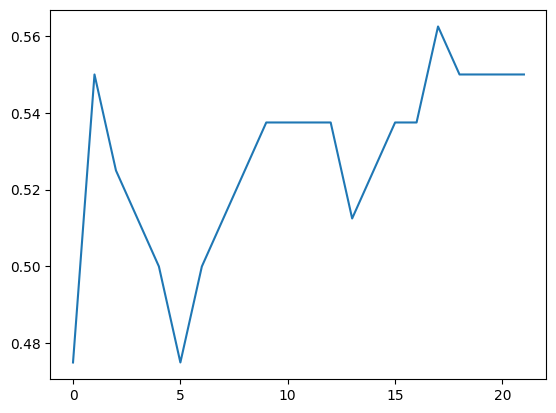

In [19]:
plt.plot(history.history['accuracy'])

In [ ]:
Scaling:  if data normally distributed then use StandardScaler (it bring the data around the mean and std is 1) (data will be in circular form)
          if data range is know or data has the outlier then use min max Scaler (min-max value of data will 0-1)

### `How to reduce the overfitting`
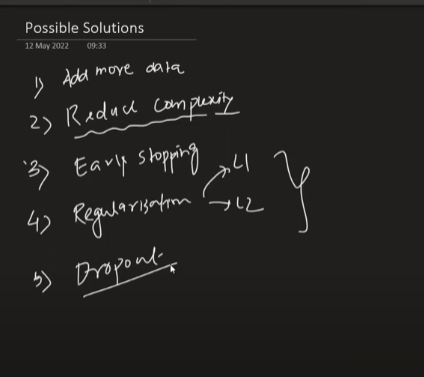


# Dropout Layers (To reduce the overfitting) by choosing the droput ratio

`only for training`

- in Dropout we drop random neuron from the our input and hidden layer for every epochs

- means for every epoch the NN arch will be different when we drop the neuron
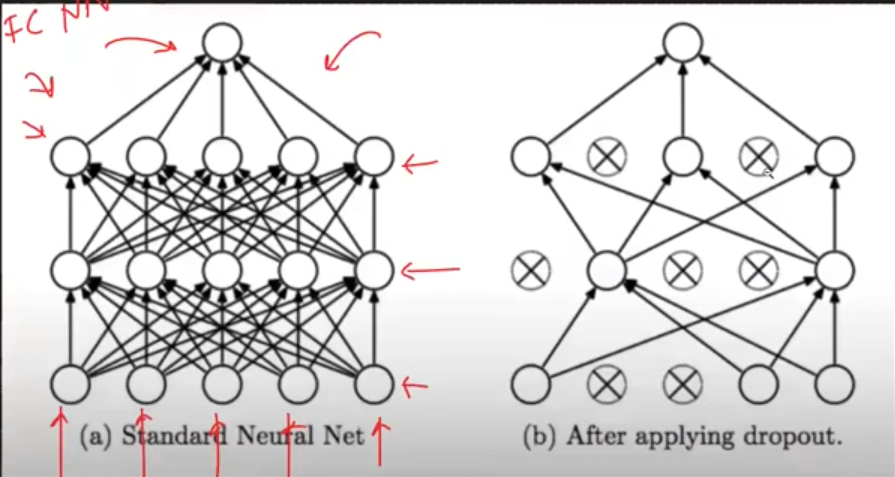

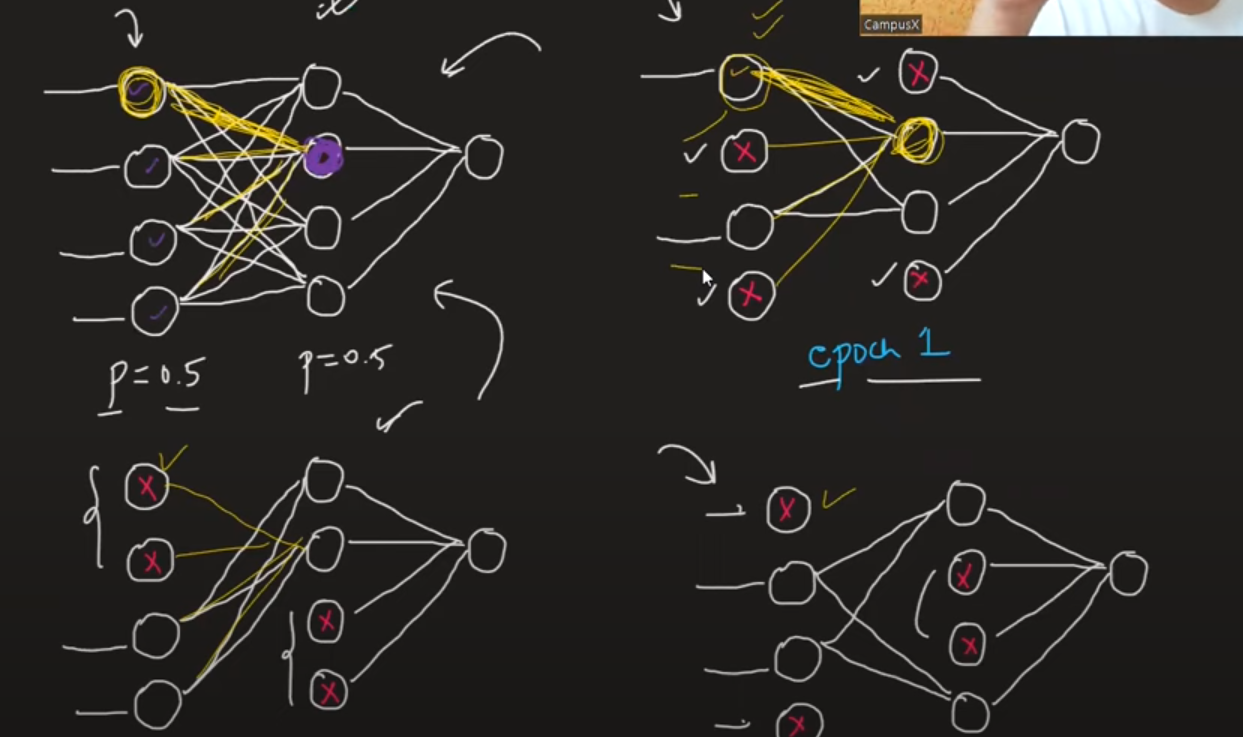

### `why this method work`
 - because if suppose the neuron one getting more attention or weight so it will capture more information insted of other neruron but we use this drop method so that neuron will drop and it will give the importance of other neuron insted of giving more weightes to one single neuron
 
- it follow the random forest anlogy


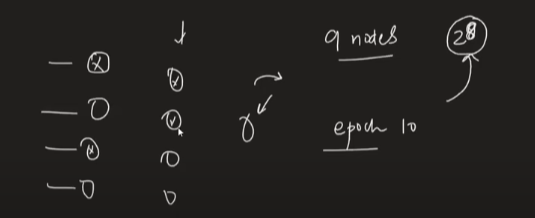

#### how prediction work for drop layer
drop out of  neuron only work for the training 
for testing the whole arch will be used(but some node are not availble in training the how to cal weight of drop node) 

while testing the weight of the drop neuron will be w(1-p) where will the drop out ratio
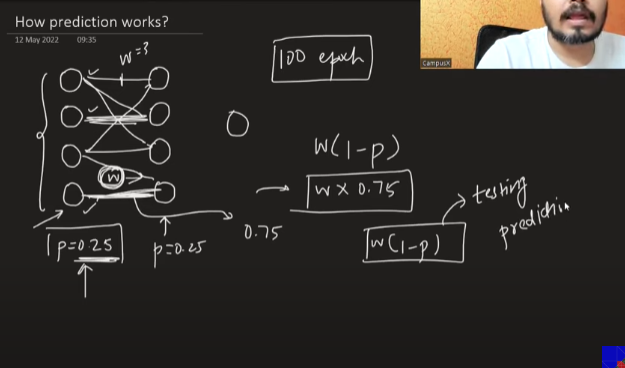

for regression dropout ratio should be in range 0.2 to 0.4

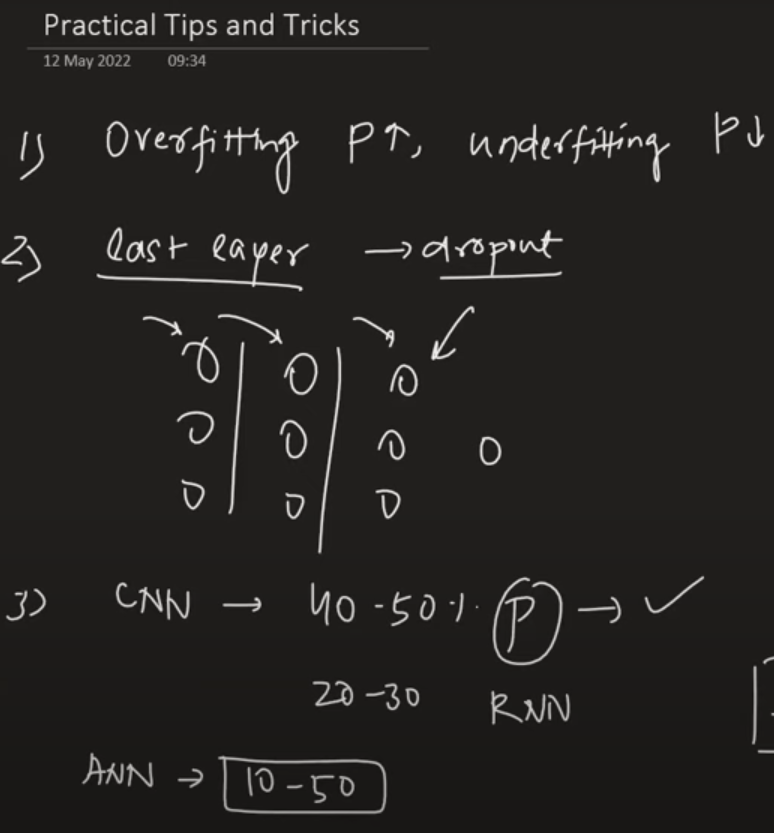


#### DrawBack of dropout ratio
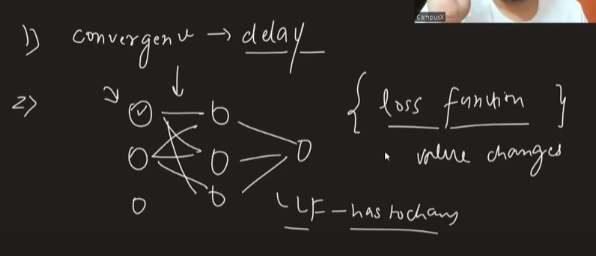

# Practical Of Dropout on Classification

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [28]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

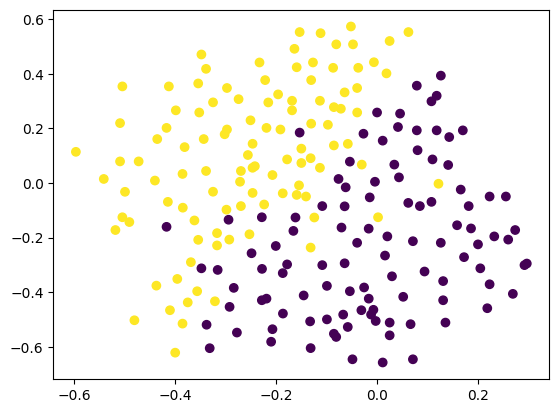

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [32]:
from keras.layers import Dropout
from keras.optimizers import Adam

model  = Sequential()

model.add(Dense(units=128,activation='relu',input_dim=2))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])



In [34]:
history = model.fit(X,y,epochs=500,validation_split=0.2)

Epoch 1/500
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.4446

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8666 - loss: 0.2981 - val_accuracy: 0.8605 - val_loss: 0.5247
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8837 - loss: 0.2401 - val_accuracy: 0.8140 - val_loss: 0.9051
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8497 - loss: 0.3320 - val_accuracy: 0.8372 - val_loss: 0.6591
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8973 - loss: 0.2514 - val_accuracy: 0.8605 - val_loss: 0.6333
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9259 - loss: 0.2327 - val_accuracy: 0.8605 - val_loss: 0.6398
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9391 - loss: 0.1791 - val_accuracy: 0.8605 - val_loss: 0.6625
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9321 - loss: 0.1669 - val_accuracy: 0.8605 - val_loss: 0.7116
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9218 - loss: 0.2055 - val_accuracy: 0.8605 - val_loss: 0.6618
Epoch 9/500

   1/9600 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 519us/step


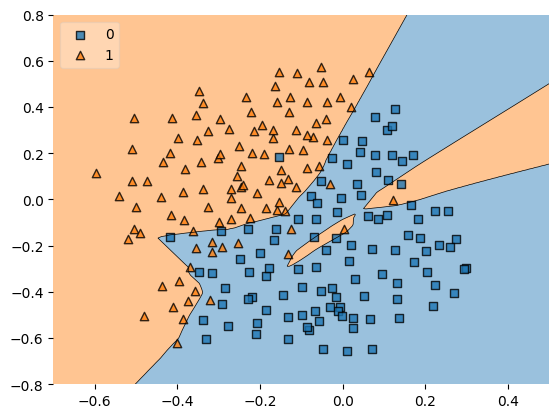

In [37]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y.astype(int),clf=model,legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

## observation <br>
- this is the overfitting issue

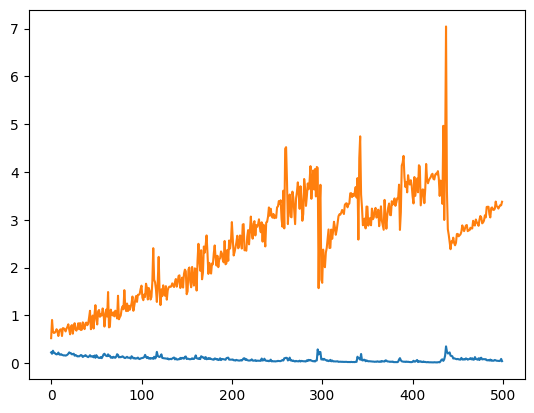

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

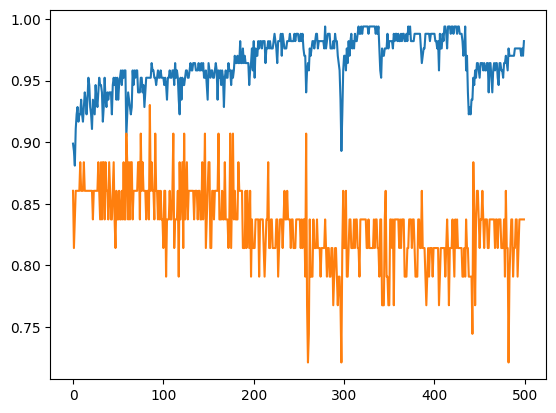

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Add the drop out to solve the overfitting 

In [40]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500


c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7815 - loss: 0.5972 - val_accuracy: 0.6279 - val_loss: 0.6930
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9191 - loss: 0.2910 - val_accuracy: 0.6977 - val_loss: 0.9989
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8949 - loss: 0.2411 - val_accuracy: 0.7442 - val_loss: 0.7331
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8812 - loss: 0.2541 - val_accuracy: 0.8605 - val_loss: 0.5719
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9120 - loss: 0.2167 - val_accuracy: 0.8605 - val_loss: 0.5596
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8971 - loss: 0.2296 - val_accuracy: 0.8605 - val_loss: 0.5835
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9028 - loss: 0.2694 - val_accuracy: 0.8140 - val_loss: 0.7395
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8982 - loss: 0.2518 - val_accuracy: 0.8605 - val_loss: 0.6928
Epoch 9/500

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 536us/step


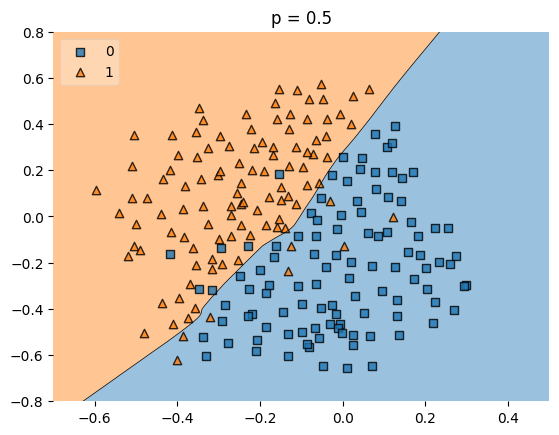

In [41]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

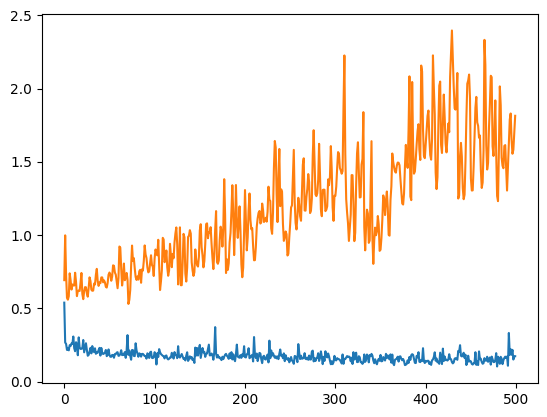

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

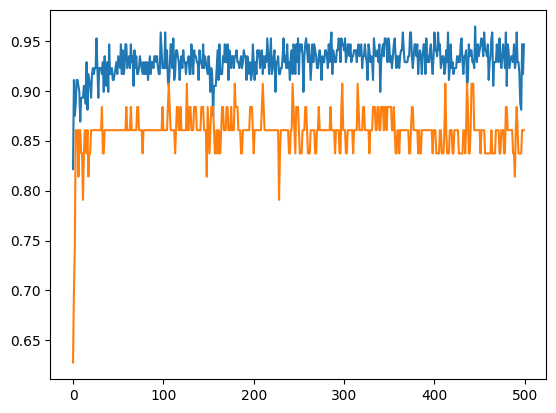

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Regularization(To Reduce the overfitting)

why overfitting occure because of the complex model: it try to capture the minuet details on training dataset

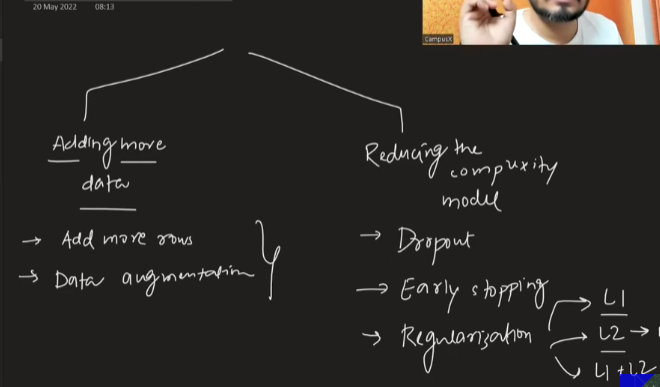

### ANN

L2 (Redge): 


`Aim  : To reduce the weight`

lambda : hyperparameter
lambda value increase the weightage of the penalty term increase
lambda =0  then penalty term will be zero
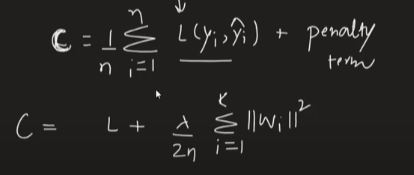

- cost function in ANN can written as below<br>
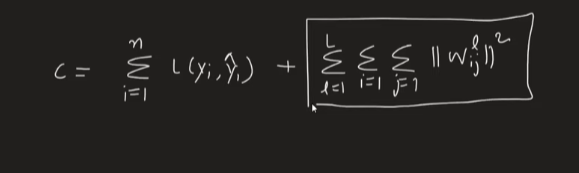

l = layer<br>
i =row<br>
j= columns



we never take the biase in penalty term<br>
we can use both l2 or l1

## Regularization Implementation

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import   Dense,Dropout
from tensorflow.keras.optimizers import Adam





In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

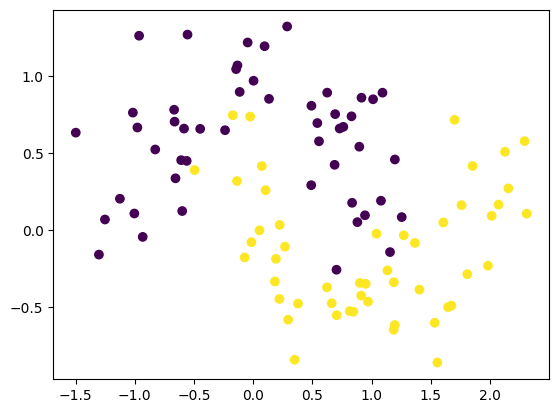

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
# Without Regularization

model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

 158/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 644us/step

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 639us/step


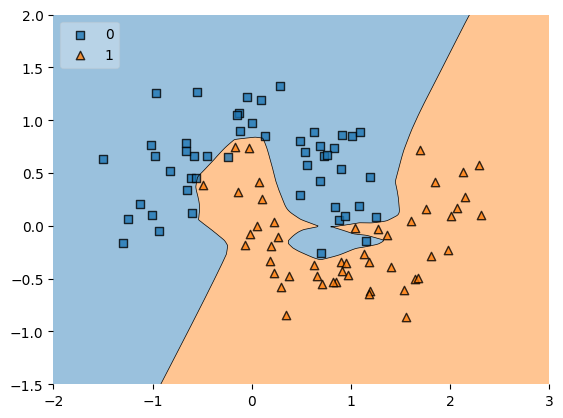

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

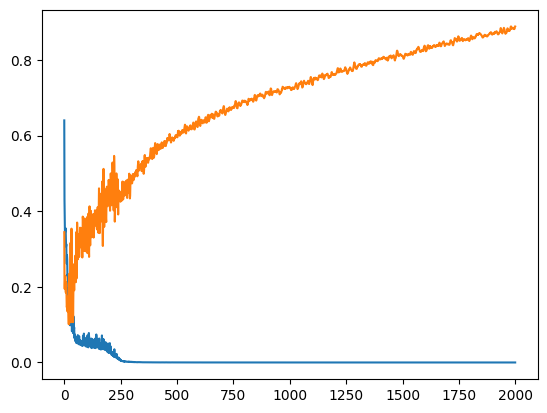

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

#### observation :
overfitting 

# With Regularization

In [8]:
from tensorflow.keras.regularizers import l1,l2

In [9]:
model2 = Sequential()



model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=l1(0.003)))
model2.add(Dense(128, activation="relu",kernel_regularizer=l1(0.003)))
model2.add(Dense(1,activation='sigmoid'))

In [10]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

 161/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 630us/step

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 647us/step


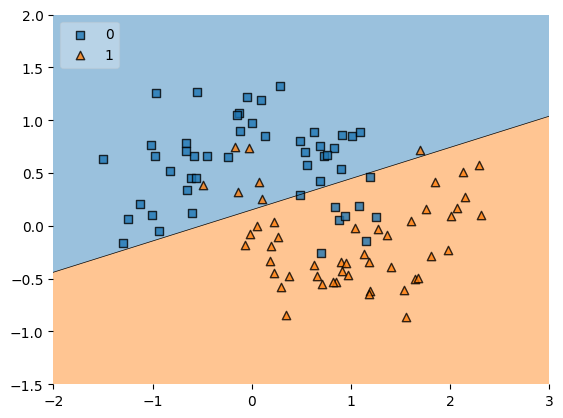

In [12]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

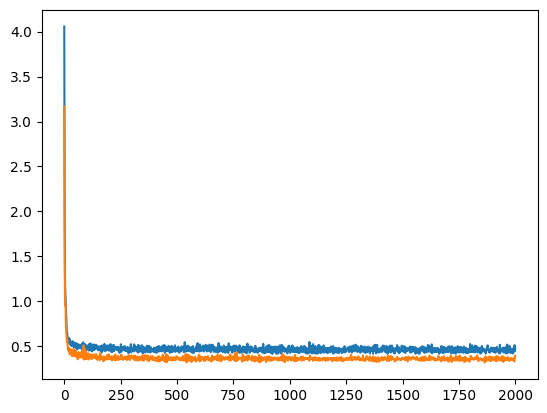

In [13]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [14]:
print(model2.get_weights()[0].shape) # weights of two input layer  128 node
print(model2.get_weights()[1].shape) # weight of the hidden layers for 128 node
print(model2.get_weights()[2].shape)
print(model2.get_weights()[3].shape)
print(model2.get_weights()[4].shape)
print(model2.get_weights()[5].shape)



(2, 128)
(128,)
(128, 128)
(128,)
(128, 1)
(1,)


In [15]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256) 
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

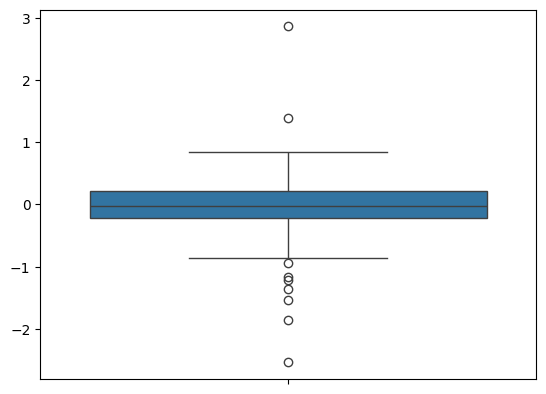

In [16]:
sns.boxplot(model1_weight_layer1)